In [1]:
import pandas as pd

In [3]:
df_bookings=pd.read_csv("datasets/fact_bookings.csv")

In [4]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [6]:
df_bookings.shape

(134590, 12)

In [7]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

<Axes: xlabel='booking_platform'>

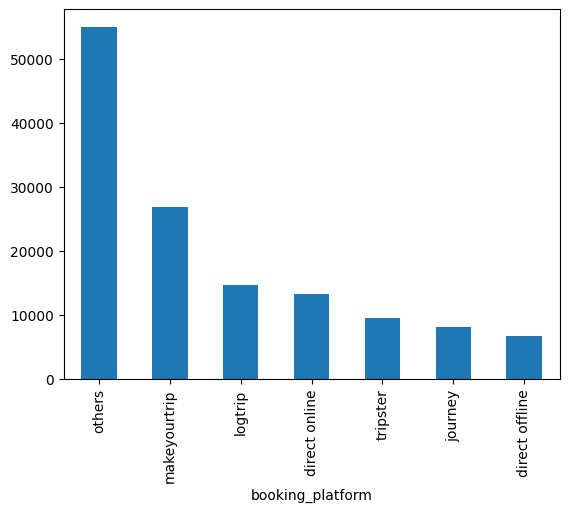

In [9]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [10]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [12]:
df_bookings.revenue_generated.min()

np.int64(6500)

In [15]:
df_date=pd.read_csv("datasets/dim_date.csv")
df_hotels=pd.read_csv("datasets/dim_hotels.csv")
df_rooms=pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings=pd.read_csv("datasets/fact_aggregated_bookings.csv")

In [16]:
df_hotels.shape

(25, 4)

In [17]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [18]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='city'>

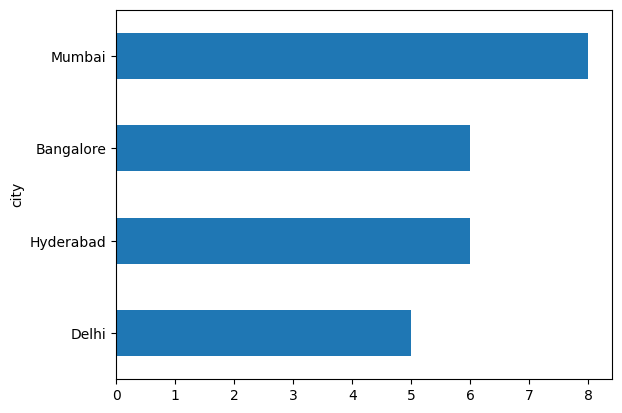

In [20]:
df_hotels.city.value_counts().sort_values().plot(kind="barh")

In [21]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [22]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [23]:
df_bookings=df_bookings[df_bookings.no_guests>0]

In [24]:
df_bookings.shape

(134578, 12)

In [25]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [26]:
mean,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [27]:
mean,std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [28]:
higher_limit=mean+ 3*std

In [29]:
lower_limit=mean - 3*std

In [30]:
higher_limit,lower_limit

(np.float64(294498.50173207896), np.float64(-263742.4278567056))

In [31]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [32]:
# outliers
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [34]:
df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit]

In [35]:
df_bookings.shape

(134573, 12)

In [36]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [37]:
mean,std=df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()

In [38]:
higher_limit=mean+ 3*std

In [39]:
lower_limit=mean- 3*std

In [40]:
higher_limit,lower_limit

(np.float64(33479.358661845814), np.float64(-8087.391491611072))

In [46]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [48]:
23439.308444+ 3*9048.599076
# no outliers

50585.105672000005

In [50]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [53]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [54]:
df_agg_bookings["occ_pct"]=df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]

In [55]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [56]:
df_agg_bookings["occ_pct"]=df_agg_bookings.occ_pct.apply(lambda x : round(x*100,2))

In [57]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [58]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [59]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [60]:
df=pd.merge(df_agg_bookings,df_rooms,right_on="room_id",left_on="room_category")

In [61]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [62]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.040278
Premium         58.028213
Presidential    59.300461
Standard        58.224247
Name: occ_pct, dtype: float64

In [63]:
df.drop("room_id",axis=1,inplace=True)

In [64]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [66]:
df=pd.merge(df,df_hotels,on="property_id")

<Axes: xlabel='city'>

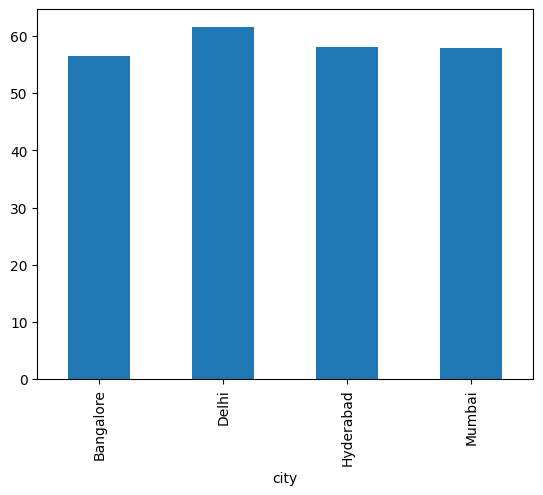

In [67]:
df.groupby("city")["occ_pct"].mean().plot(kind="bar")

In [69]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [70]:
df=pd.merge(df,df_date,left_on="check_in_date",right_on="date")

In [71]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [72]:
df.groupby("day_type")["occ_pct"].mean()

day_type
weekeday    50.903780
weekend     72.393432
Name: occ_pct, dtype: float64

In [74]:
df["mmm yy"].value_counts()

mmm yy
May 22    2200
Jul 22    2200
Jun 22    2100
Name: count, dtype: int64

In [76]:
df_june=df[df["mmm yy"]=="Jun 22"]

In [77]:
df_june.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

In [79]:
df_aug=pd.read_csv("datasets/new_data_august.csv")

In [80]:
df_aug.shape

(7, 13)

In [82]:
df.shape

(6500, 14)

In [85]:
latest_df=pd.concat([df,df_aug],ignore_index=True,axis=0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6497,17558,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6498,19563,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6499,17561,31-Jul-22,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [86]:
latest_df.shape

(6507, 15)

In [87]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on="property_id")

In [88]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [89]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [91]:
df_date["date"]=pd.to_datetime(df_date["date"])

C:\Users\yasod\AppData\Local\Temp\ipykernel_12832\1124805798.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]=pd.to_datetime(df_date["date"])


In [98]:
df_bookings_all["check_in_date"] = pd.to_datetime(
    df_bookings_all["check_in_date"],
    format="mixed",
    dayfirst=True)    # because things like 13-05-22 are day-first
